In [29]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [30]:
# sum()을 하면 true값만 합쳐줌
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [4]:
%matplotlib inline

<Figure size 432x288 with 0 Axes>

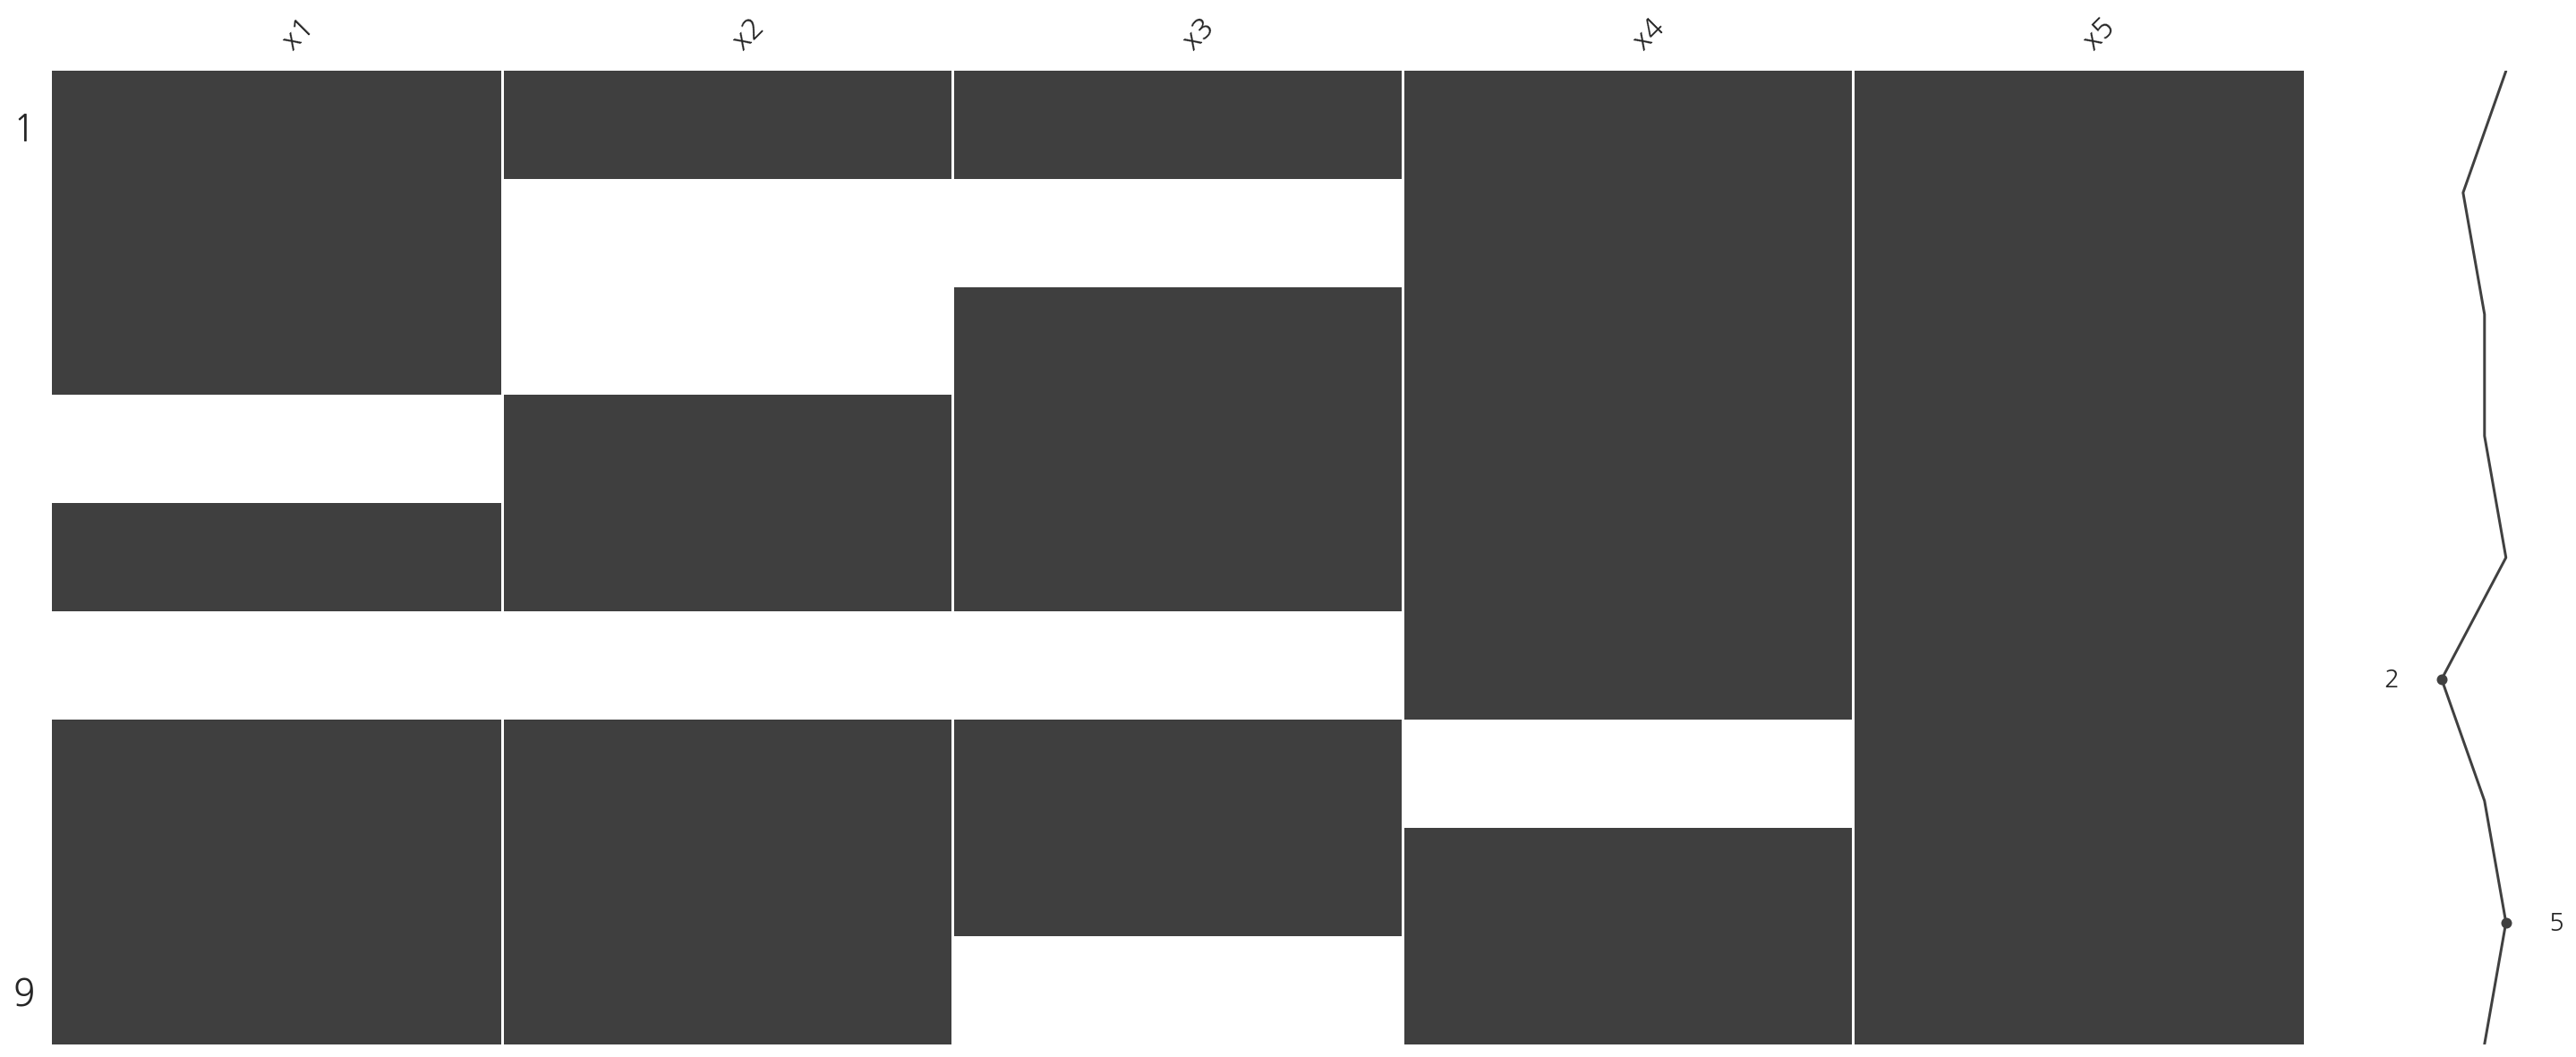

In [6]:
import missingno as msno

plt.figure(facecolor="1.")
msno.matrix(df)
plt.show()

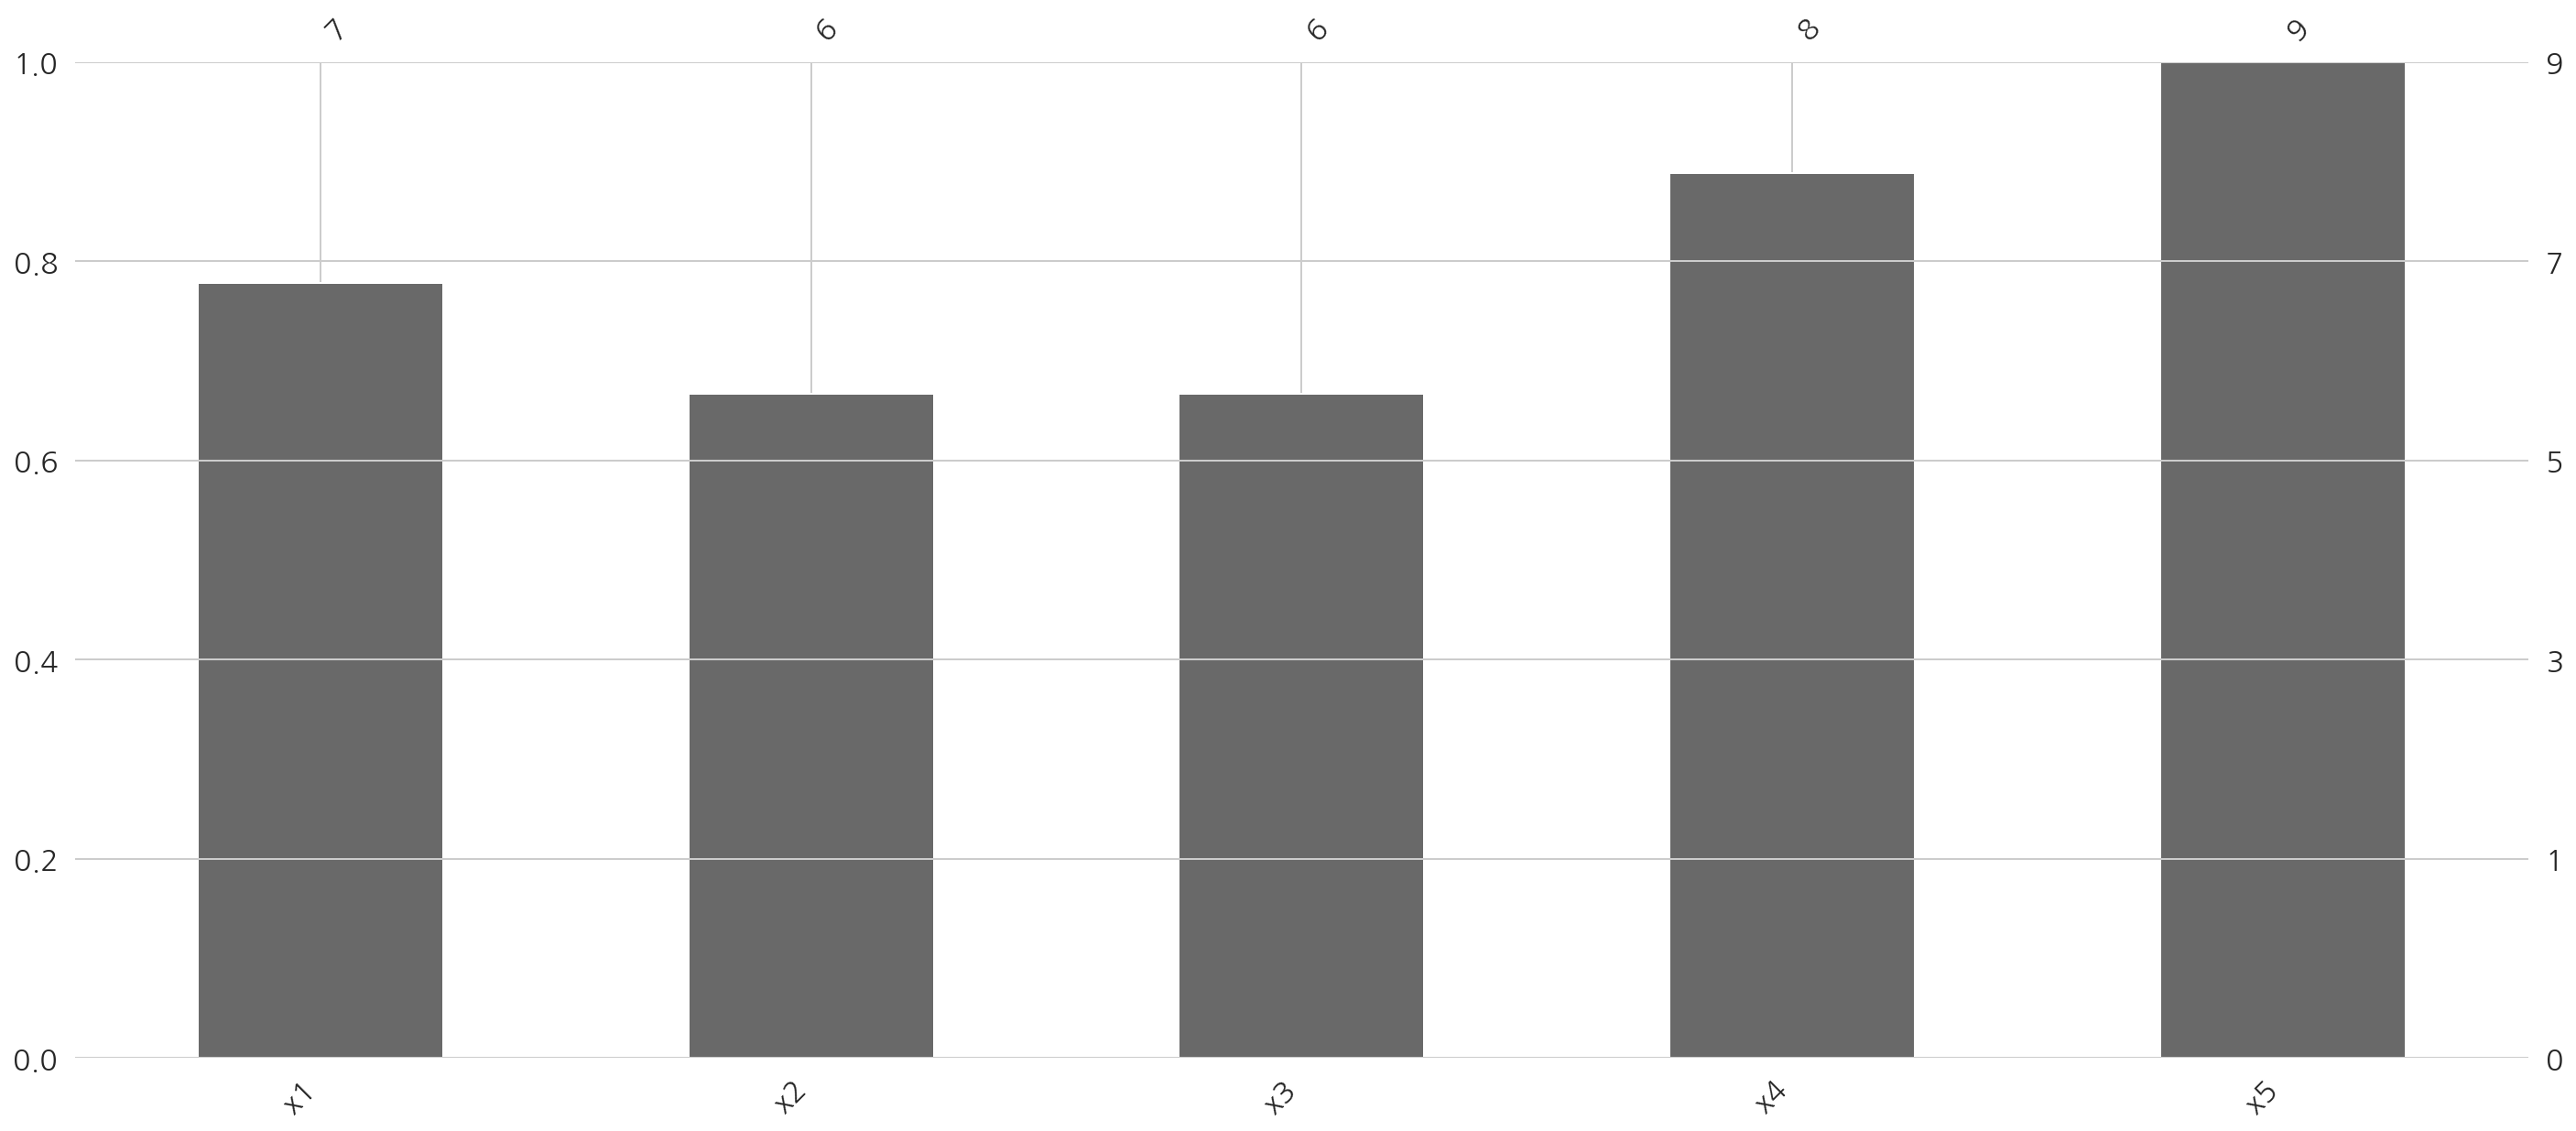

In [8]:
plt.figure(facecolor="1.")
msno.bar(df)
plt.show()

<Figure size 432x288 with 0 Axes>

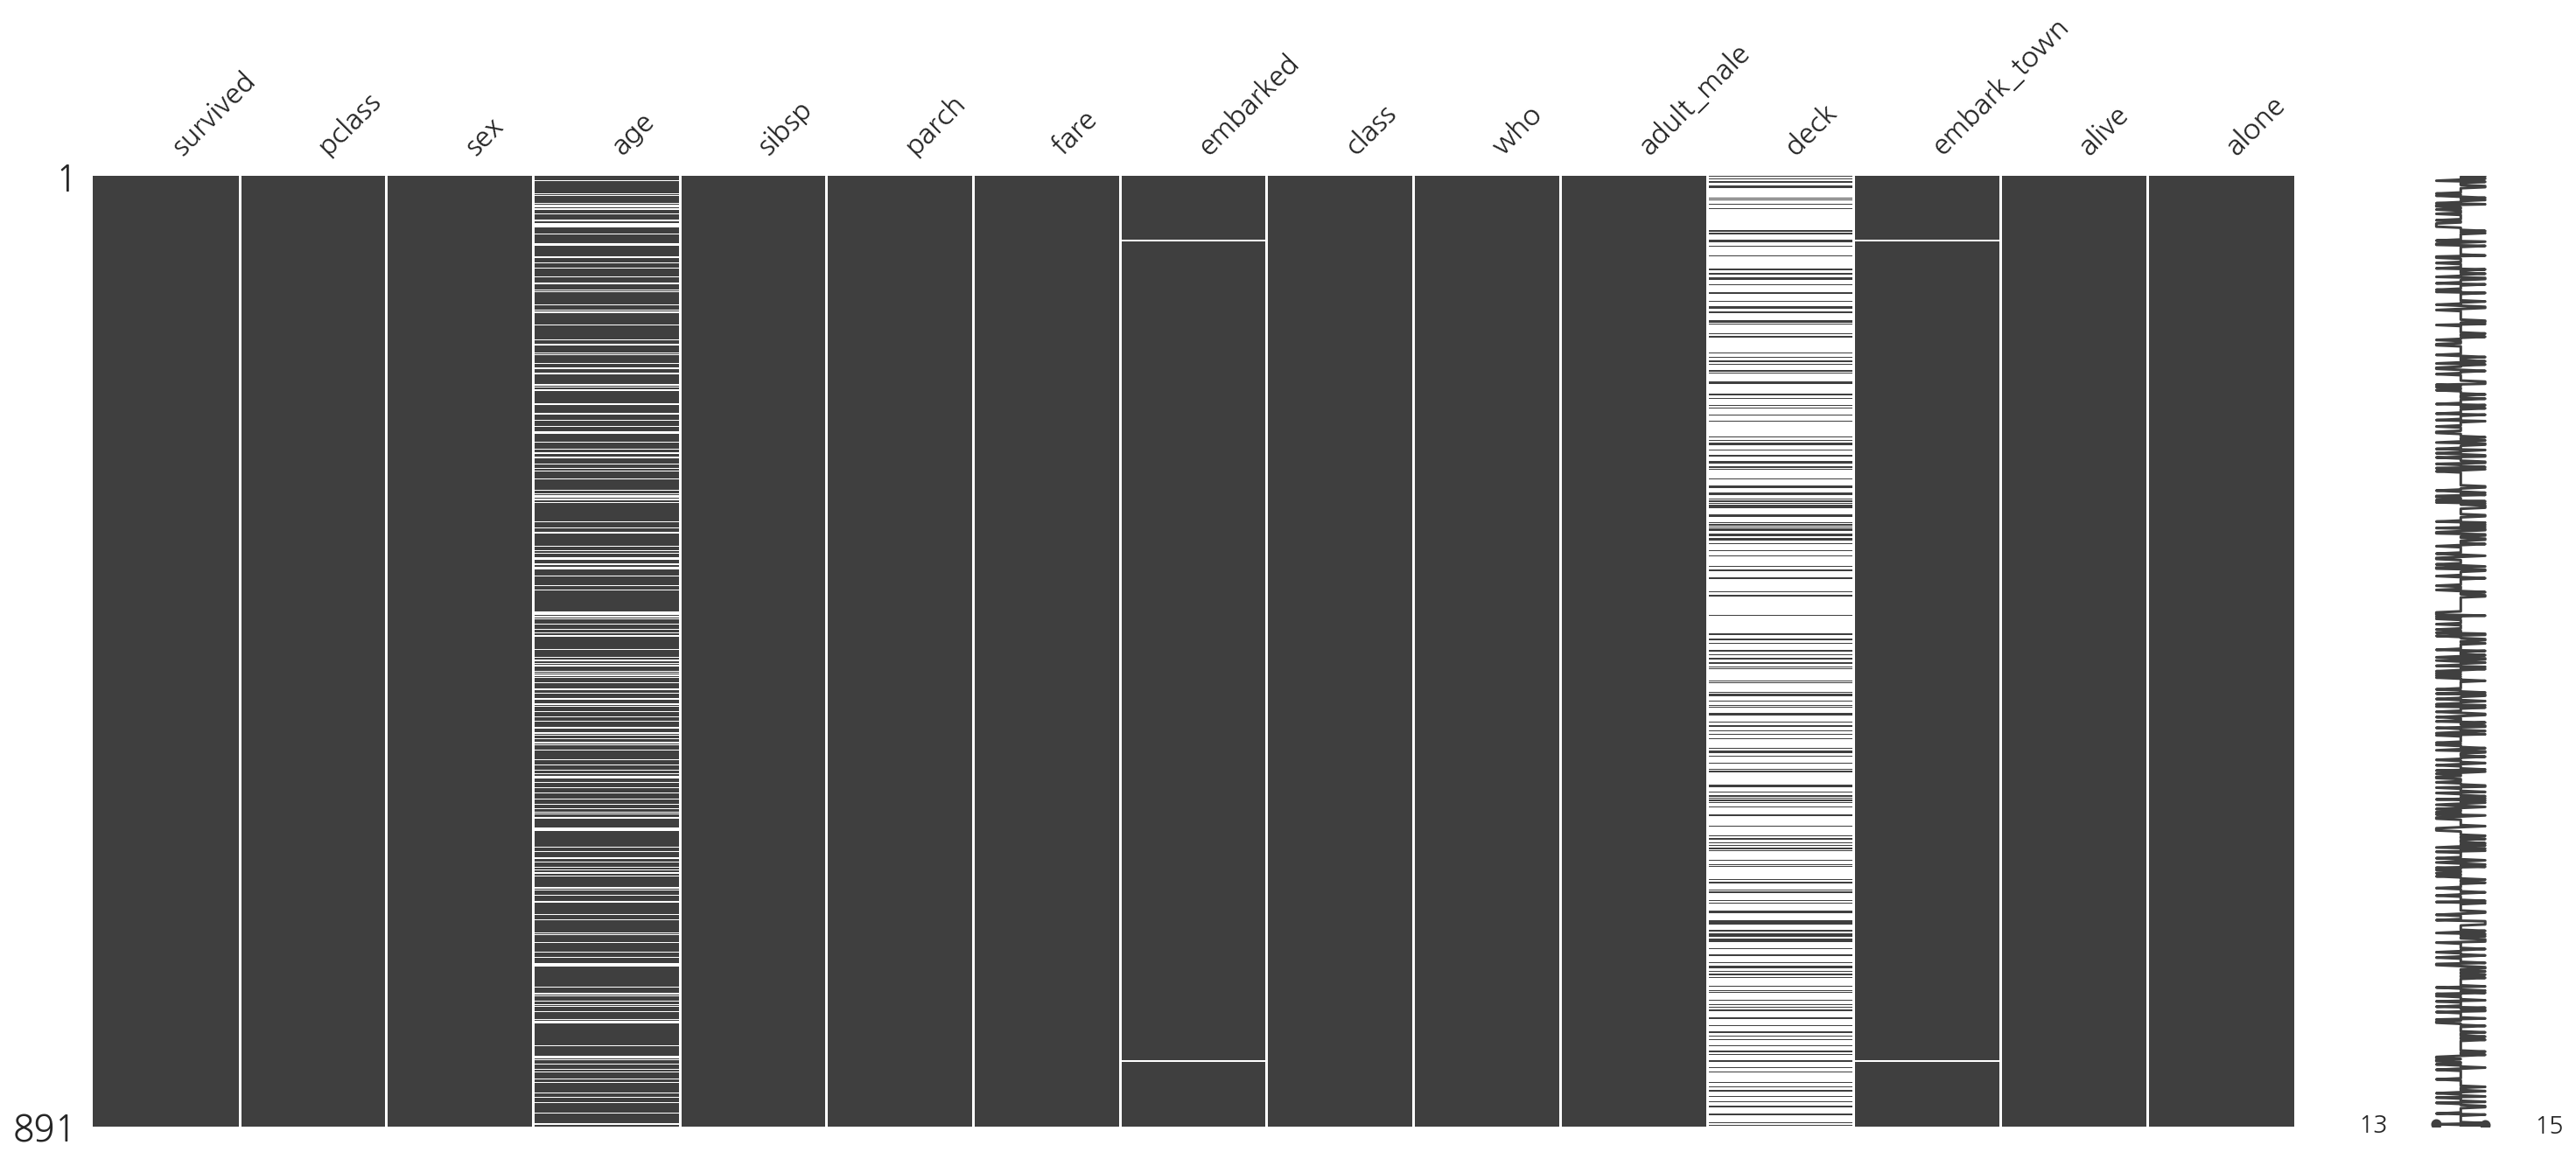

In [9]:
titanic = sns.load_dataset("titanic")
plt.figure(facecolor="1.")
msno.matrix(titanic)
plt.show()

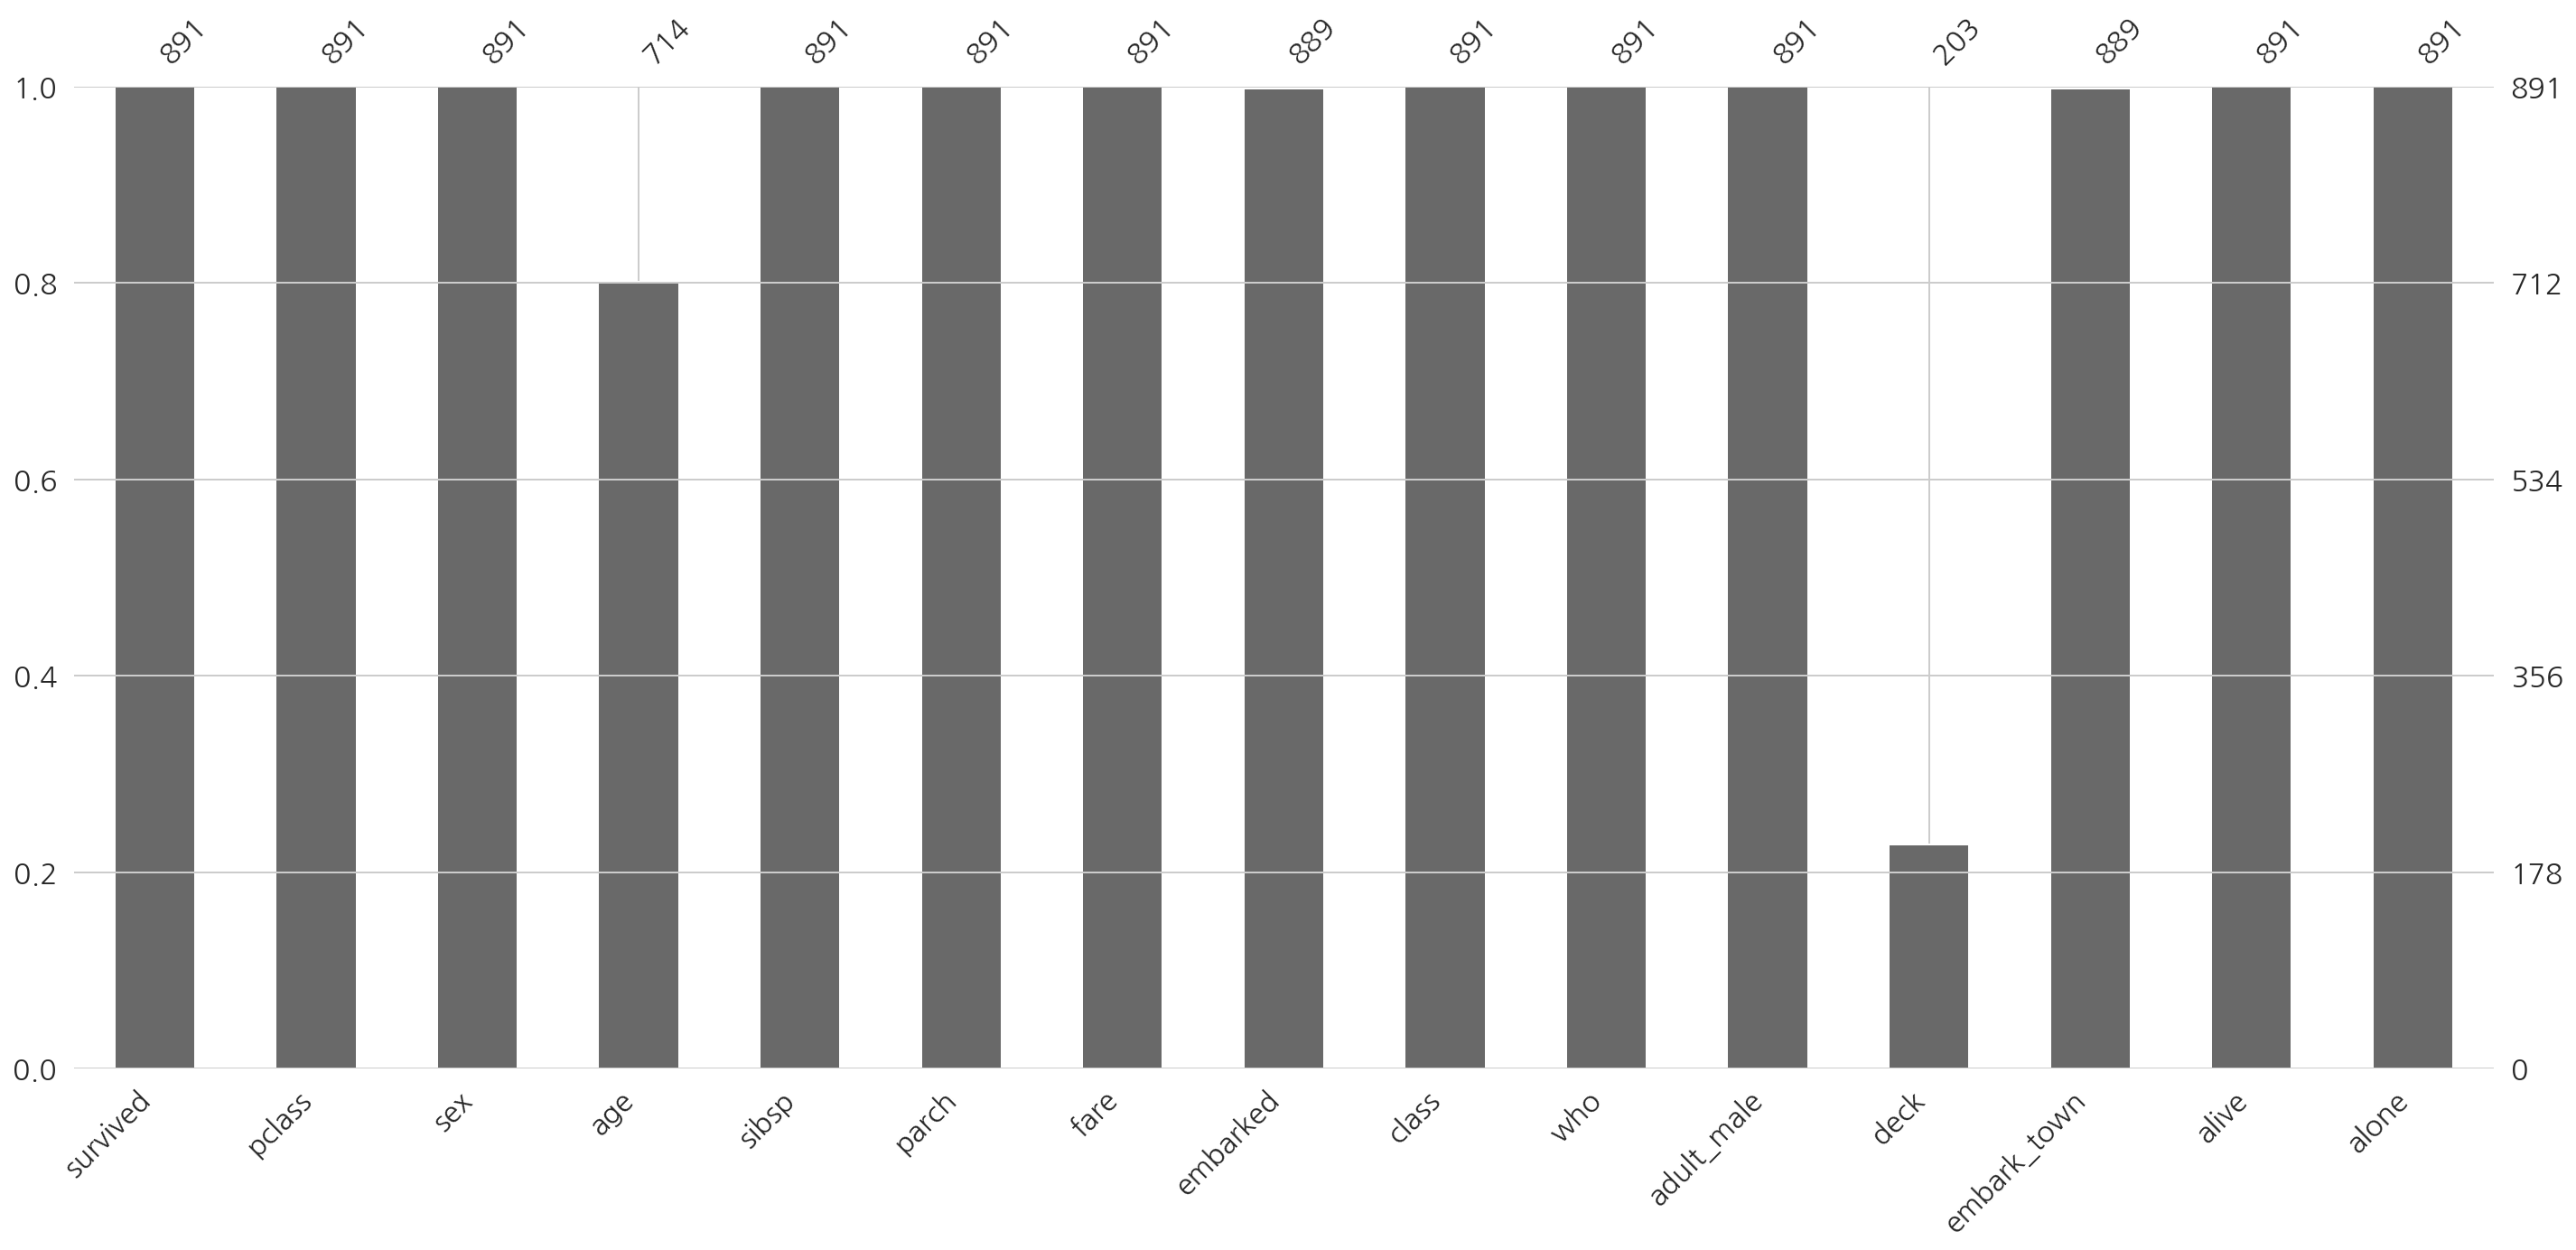

In [10]:
plt.figure(facecolor="1.")
msno.bar(titanic)
plt.show()

In [19]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [31]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [32]:
# axis : 1 = 열 기준 삭제, 0(default) : 행 기준 삭제
# thresh : 비결측 데이터의 최소 갯수
df.dropna(thresh = 7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


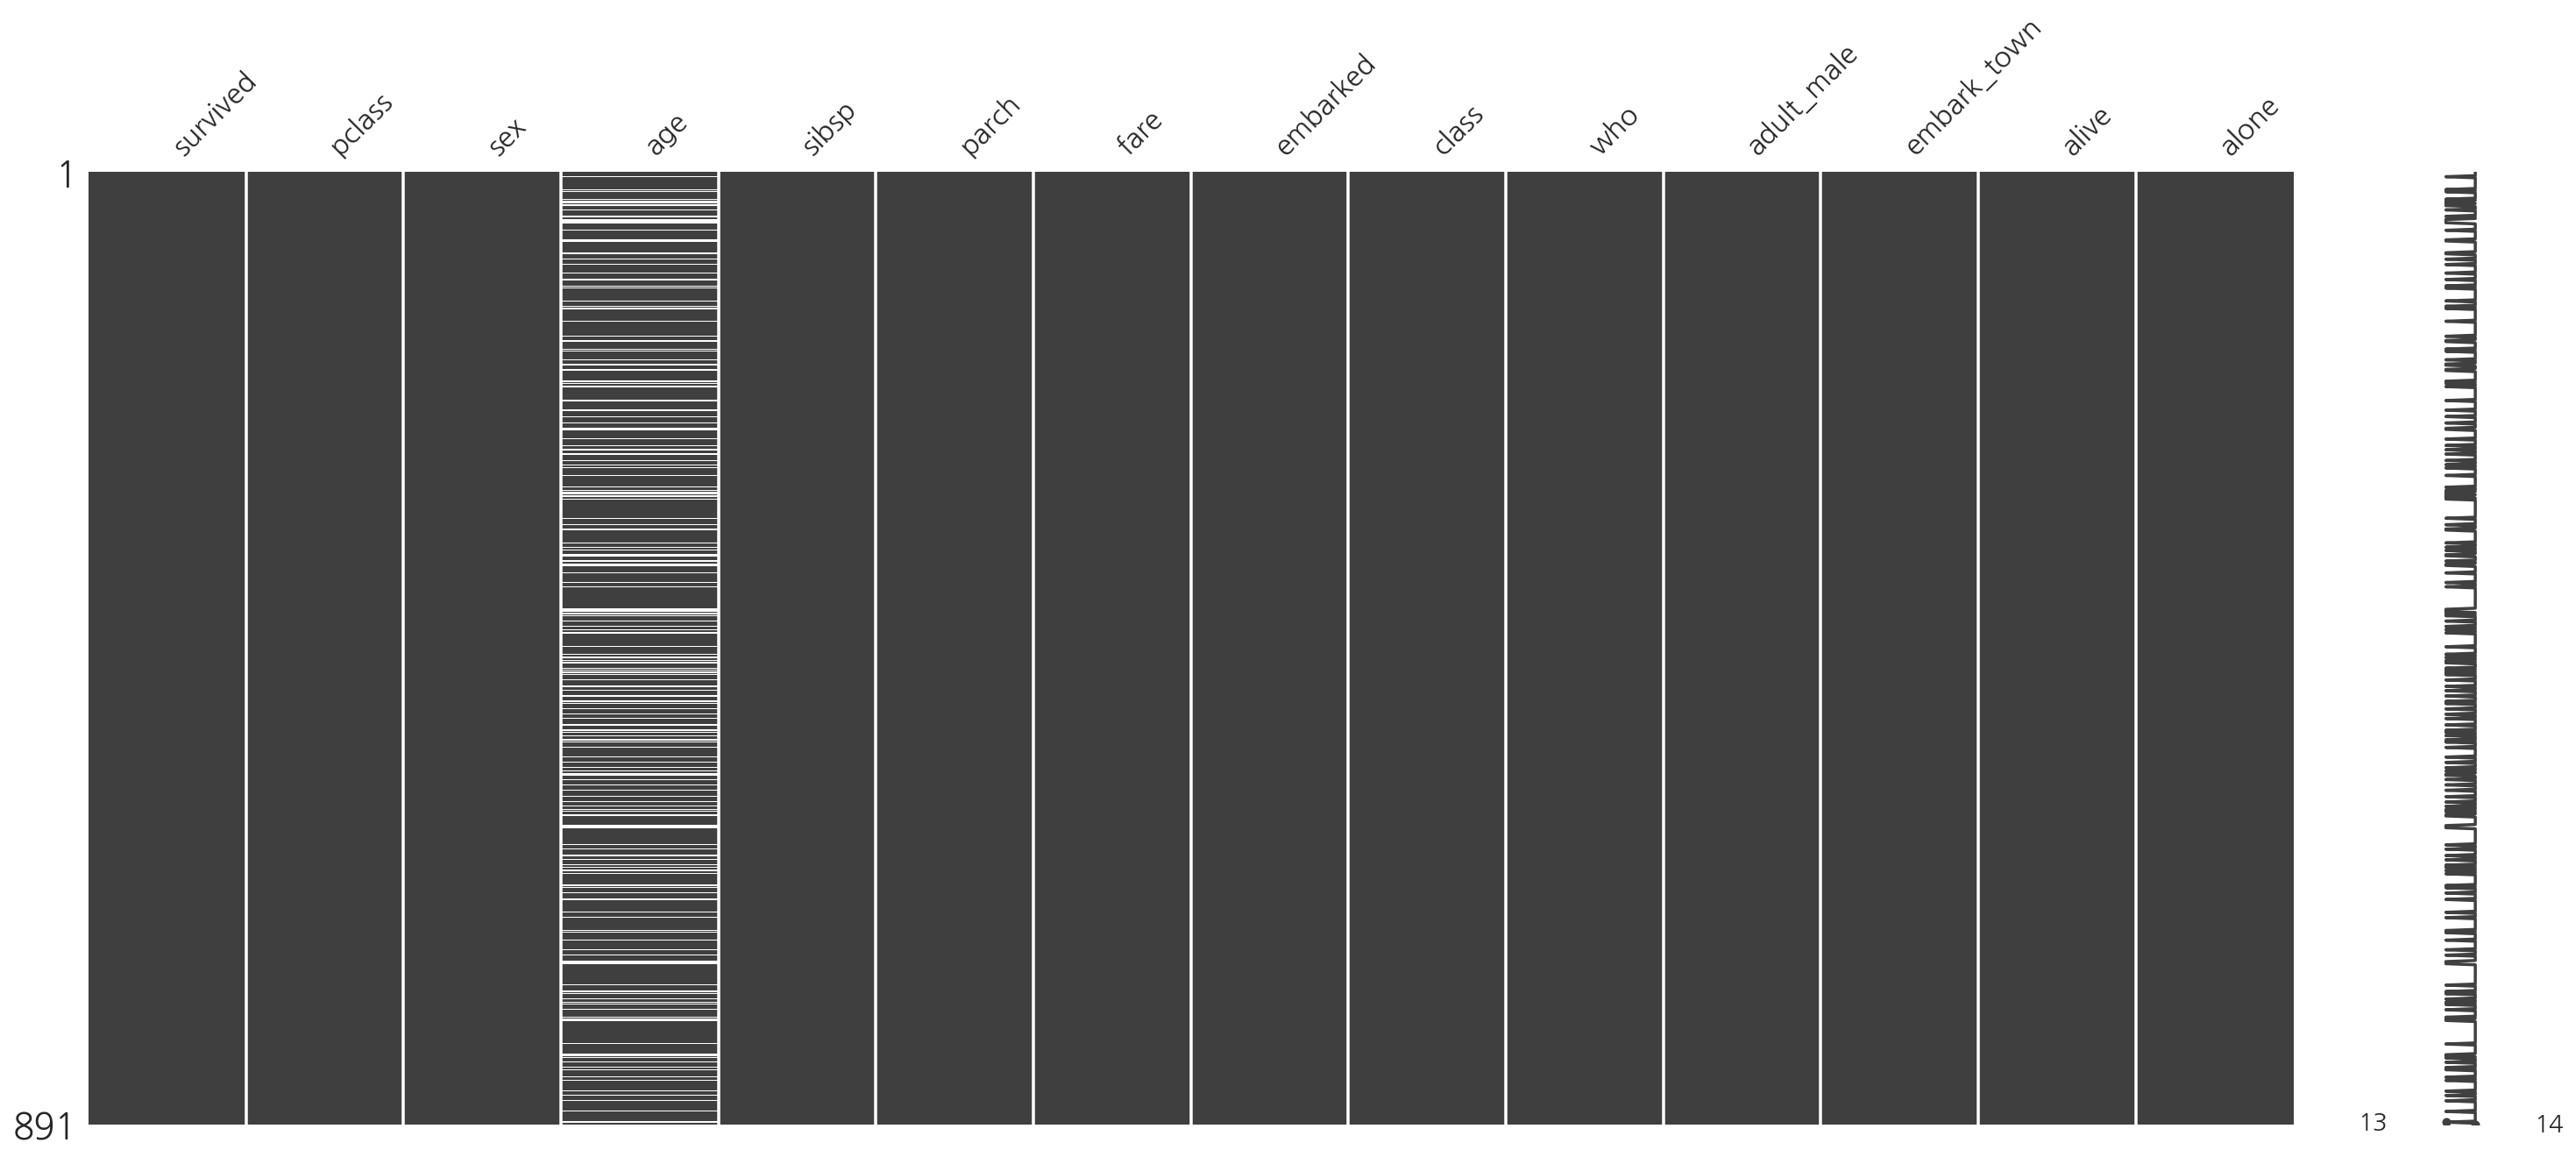

In [46]:
# 데이터가 절반 이상이 없는 열을 삭제
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1)
# plt.figure(facecolor="1.")
msno.matrix(titanic)
plt.show()

#### SimpleImputer
- SimpleImputer 클래스 객체 생성
    - strategy 인수 : mean = 평균값, median = 중앙값, most_frequent = 최빈값을 대체값으로 사용
- fit_transform 메서드로 대체값 대신 채워진 데이터 프레임 생성

In [33]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

AttributeError: 'bool' object has no attribute 'transpose'

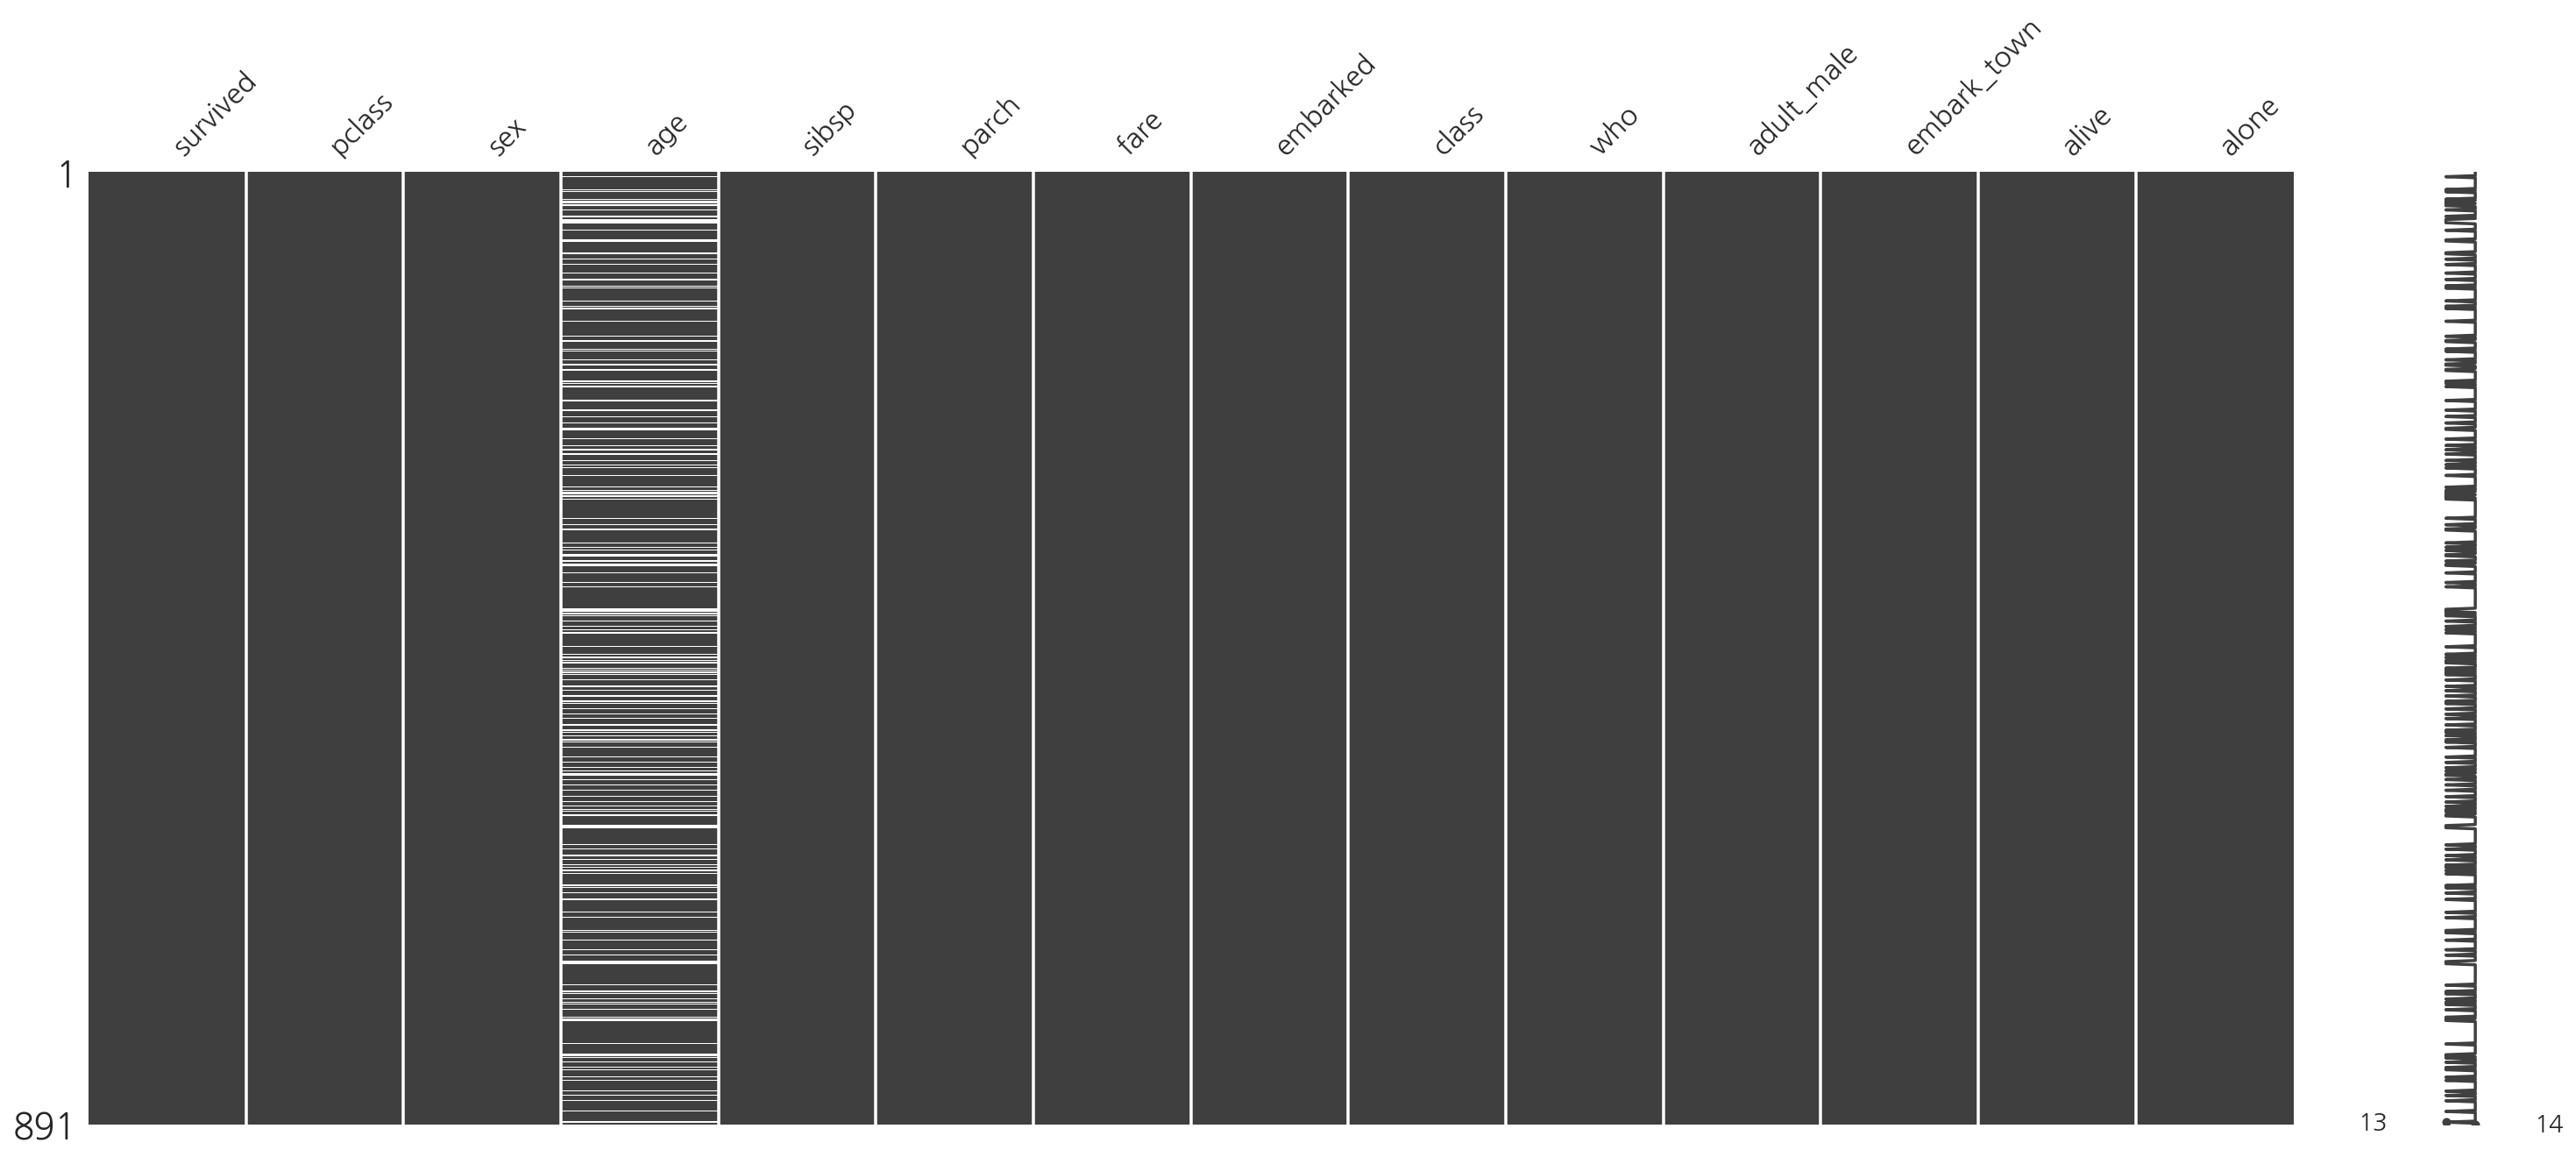

In [45]:
from sklearn.impute import SimpleImputer


imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])
#plt.figure(facecolor="1.")
msno.matrix(titanic)
plt.show()

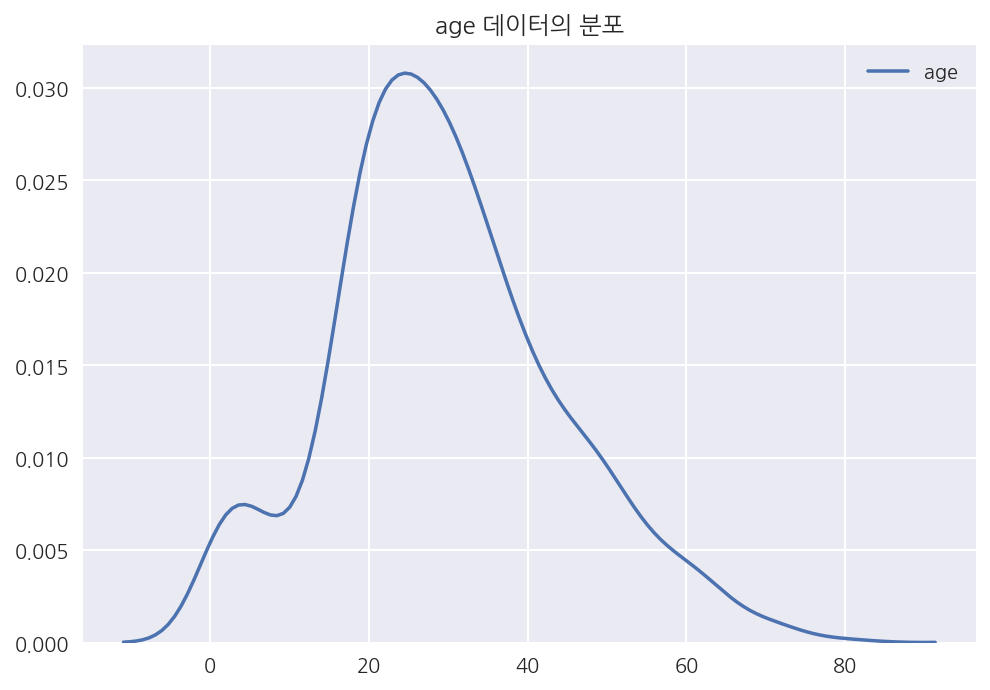

In [44]:
# plt.figure(facecolor="1.")
sns.kdeplot(titanic.age)
plt.title("age 데이터의 분포")
plt.show()

In [43]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

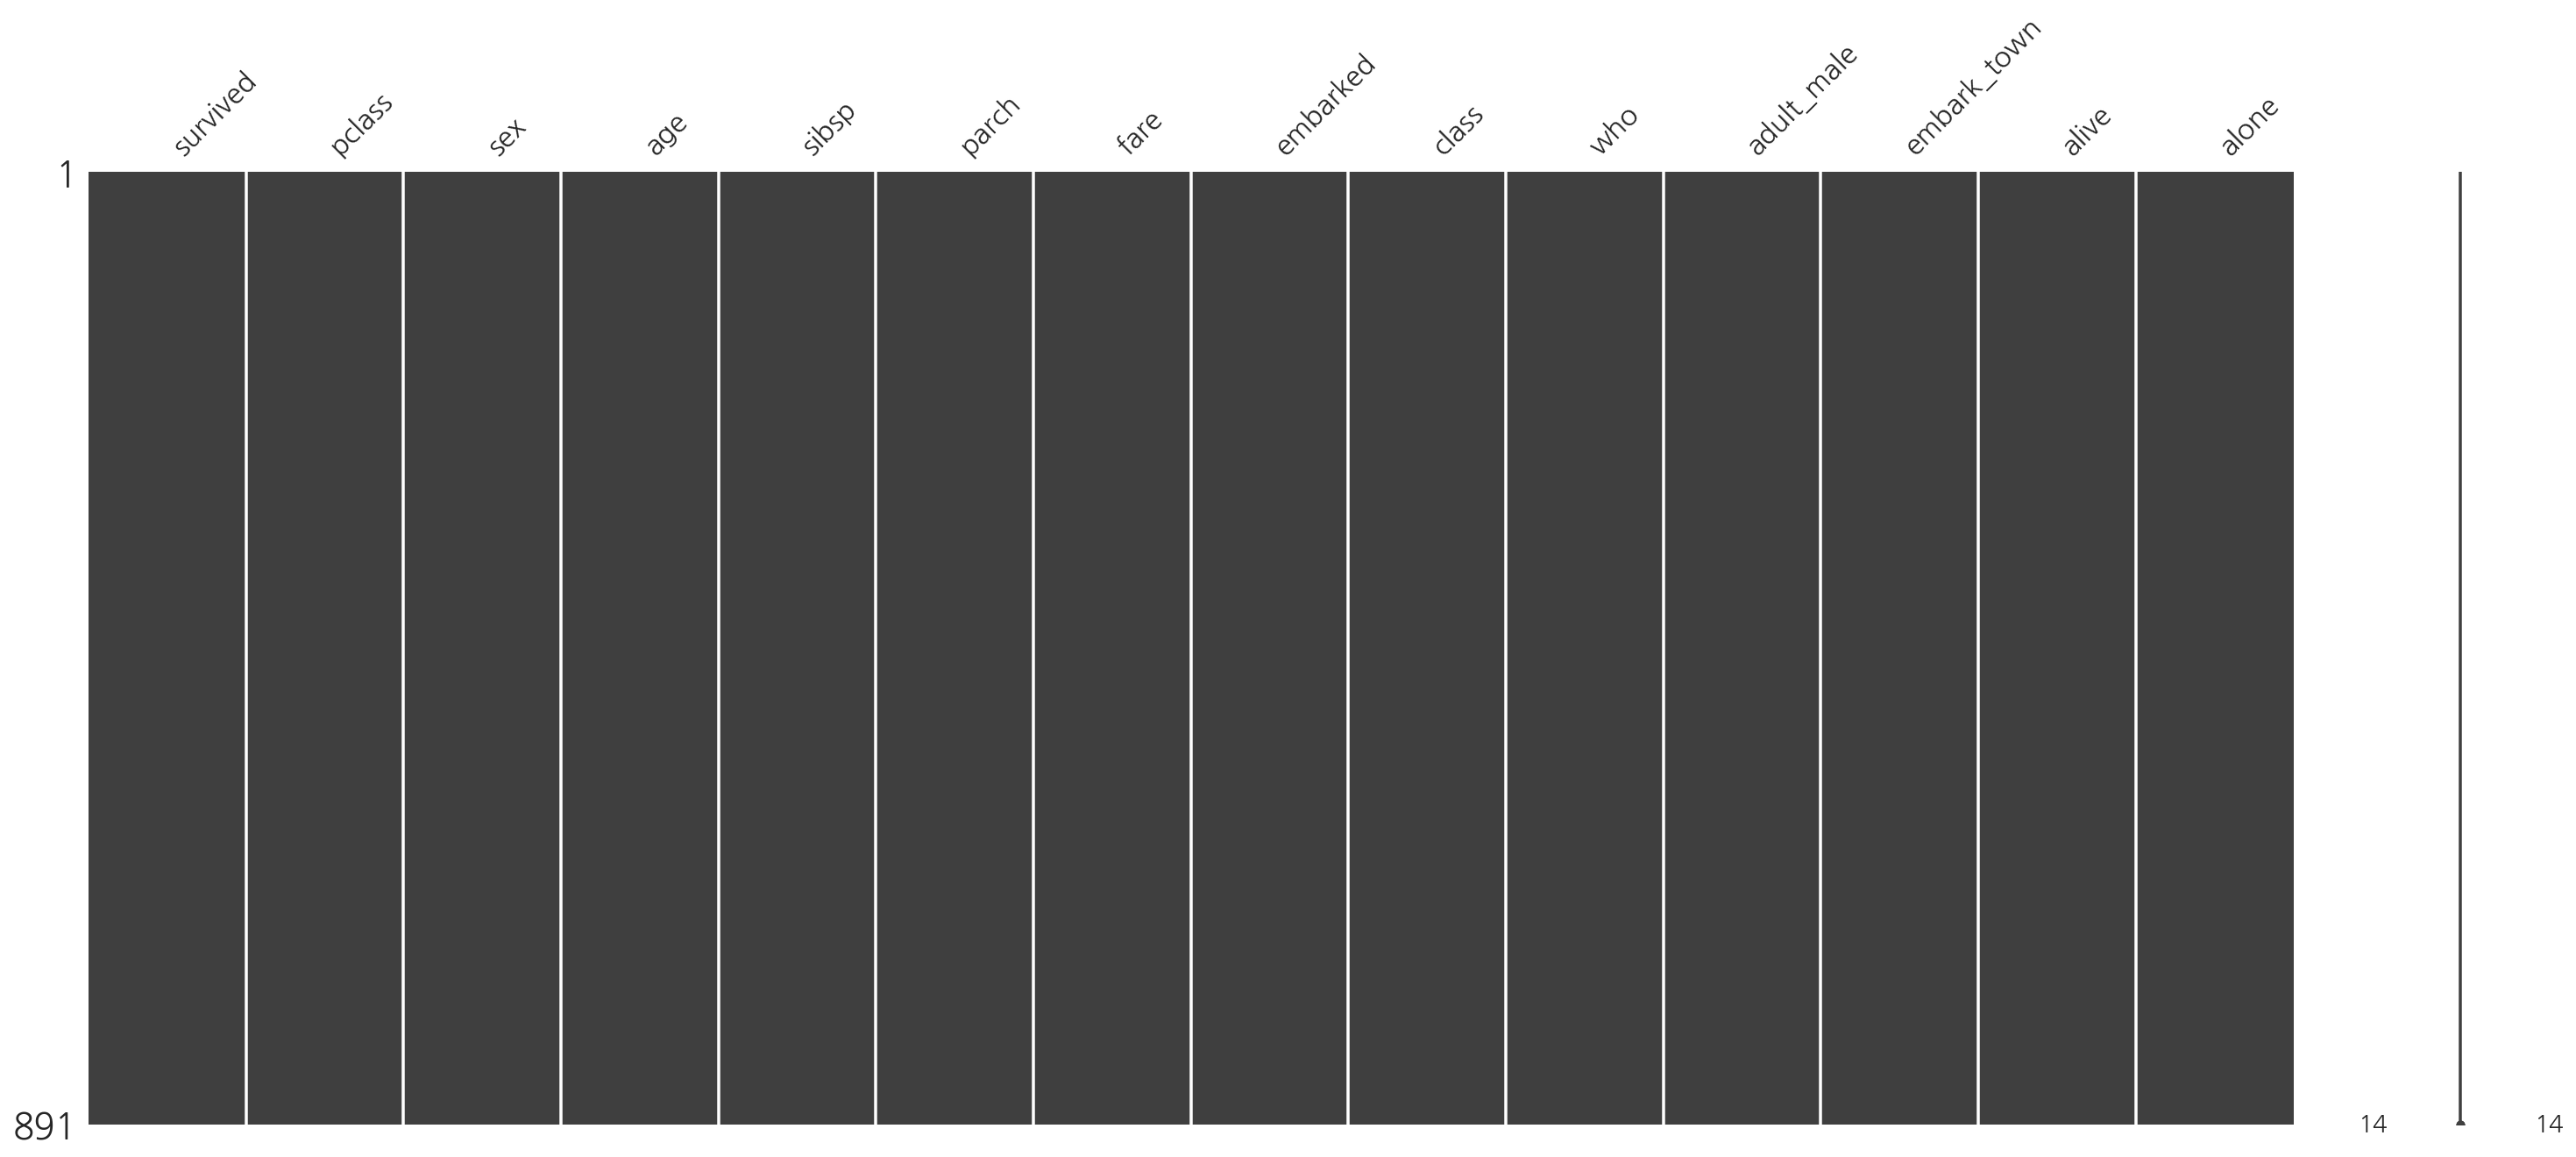

In [47]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])

msno.matrix(titanic)
plt.show()

In [48]:
from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [52]:
from patsy import dmatrix 

dmatrix("x1 + 0", data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [53]:
# + 0, - 1 은 1로 구성된 상수항을 넣지 말라는 뜻
# 추후 회귀분석 시 상수항 반드시 존재 해야함 -> 보통은 + 0은 해주지 않음
dmatrix("x1 + x2 + x3 + 0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [54]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [56]:
dmatrix('survived + pclass + age', data = titanic)

DesignMatrix with shape (714, 4)
  Intercept  survived  pclass  age
          1         0       3   22
          1         1       1   38
          1         1       3   26
          1         1       1   35
          1         0       3   35
          1         0       1   54
          1         0       3    2
          1         1       3   27
          1         1       2   14
          1         1       3    4
          1         1       1   58
          1         0       3   20
          1         0       3   39
          1         0       3   14
          1         1       2   55
          1         0       3    2
          1         0       3   31
          1         0       2   35
          1         1       2   34
          1         1       3   15
          1         1       1   28
          1         0       3    8
          1         1       3   38
          1         0       1   19
          1         0       1   40
          1         0       2   66
          1         0 

In [57]:
# 데이터 변형
dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [58]:
# 함수도 가능
def ten_times(x):
    return 10 * x

dmatrix("ten_times(x1)", df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [59]:
dmatrix("x1 + x2 + x1:x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [60]:
dmatrix("x1 * x2 + 0", df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [61]:
# x1 데이터에서 x1의 평균을 뺀 것과 같은 결과
dm = dmatrix("center(x1) + 0", df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [62]:
# 평균값은 design_info 속성 내부에 저장
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

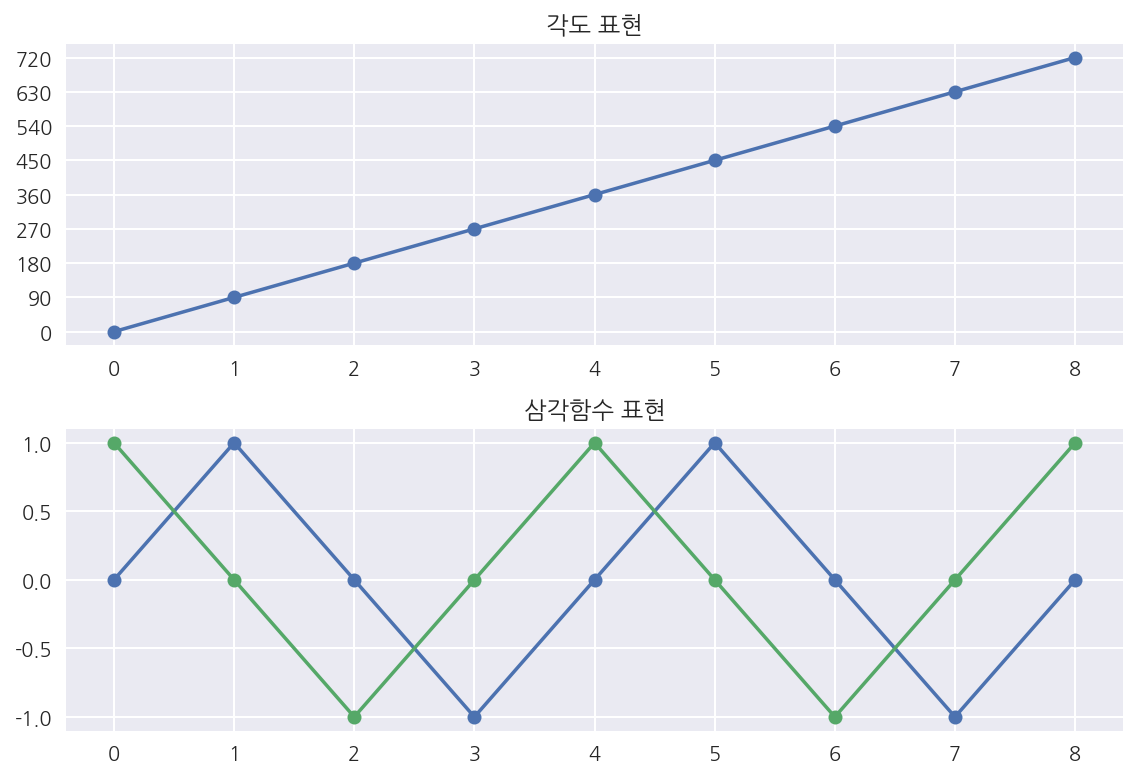

In [63]:
X = 90 * np.arange(9).reshape(-1, 1) 

from sklearn.preprocessing import FunctionTransformer

def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("각도 표현")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("삼각함수 표현")
plt.tight_layout()
plt.show()

# 회귀분석 시 x가 각도일 경우
# 각도는 두개의 변수로 쪼개줘야함
# 각도를 직접 넣어서 쓰면 안됨
# x를 sin cos으로 되어있는 쌍으로 바꿔줘야함


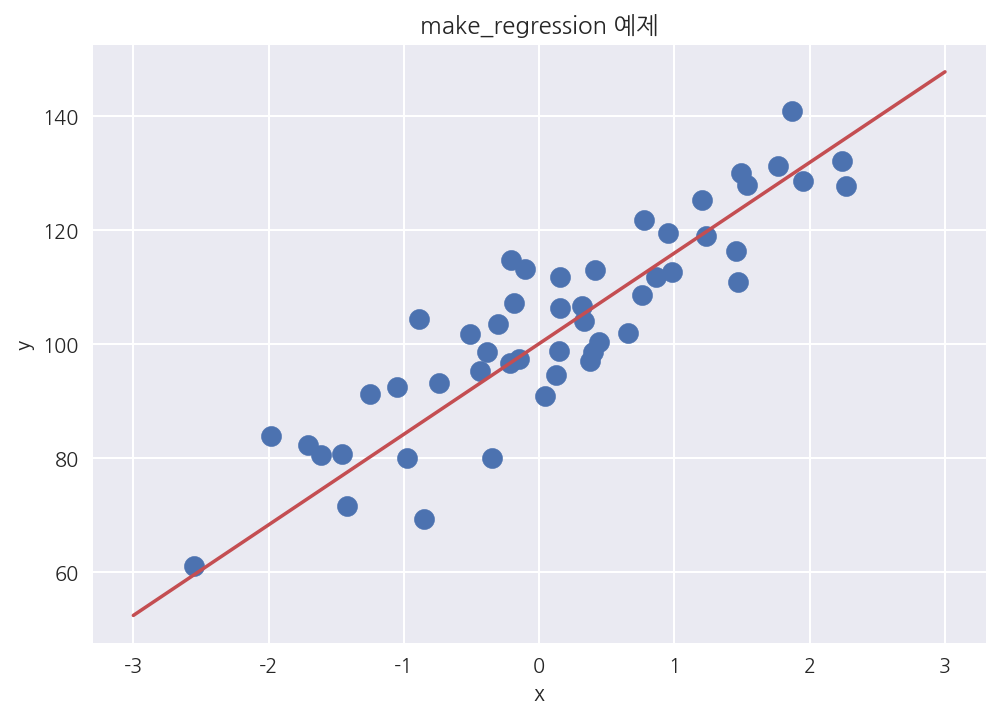

In [82]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

In [86]:
X

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

In [87]:
y

array([ 69.16576208, 129.94932345,  80.01389923, 100.30585701,
       107.20314663, 140.88561123, 112.99506826,  82.25108224,
        71.56780523, 111.67769684, 112.48530888, 114.65029223,
       111.71570029, 101.63406761, 127.78240131,  93.08609825,
        80.69164687, 113.11903254,  61.0218126 , 131.15670173,
        91.08078405,  79.88503003,  90.81838842,  95.10877879,
       108.56190647,  98.64651153,  96.63568503, 125.15577947,
        98.56417169, 131.95814648, 121.75870162, 106.25707916,
        80.40782312, 128.46531432,  98.60107781, 110.84947303,
       116.3307515 , 103.39347869, 106.6868286 , 103.97656433,
       127.6988851 ,  97.31416893,  94.52678796,  96.96377225,
       101.80069439, 119.35745   , 118.85230744, 104.32382223,
        92.40639334,  83.7664334 ])

In [67]:
w

array(15.89695836)

In [114]:
# 연습문제 4.1.2
def make_regression2(n_samples = 100, n_features = 1, bias = 0, noise = 0, random_state = 0, coef = False):
    
    # 1. 독립변수 데이터 행렬 X를 무작위로 만든다.
    np.random.seed(random_state)
    X = np.random.normal(size = n_samples)
    # 2. 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만든다.
    w = 100 * np.random.normal(size = 1)[0]
    # 3. X와 w를 내적하고 y절편 b 값을 더하여 독립변수와 완전선형인 종속변수 벡터 y_0를 만든다.
    y_0 = X * w + bias
    # 4. 기대값이 0이고 표준편차가 noise인 정규분포를 이용하여 잡음 epsilon를 만든다.
    e = np.random.normal( scale = noise, size = n_samples)
    # 5. 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음 epsilon을 더해서 종속변수 데이터 y를 만든다.
    y = y_0 + e
    # return값
    if coef :
        return X, y, w
    else : 
        return X, y
    # X : [n_samples, n_features] 형상의 2차원 배열
    # y : [n_sapmles]형상의 1차원 배열
    # w : [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열(옵션)
    # 선형 모형의 계수 벡터 w, 입력 인수 coef가 True인 경우에만 출력

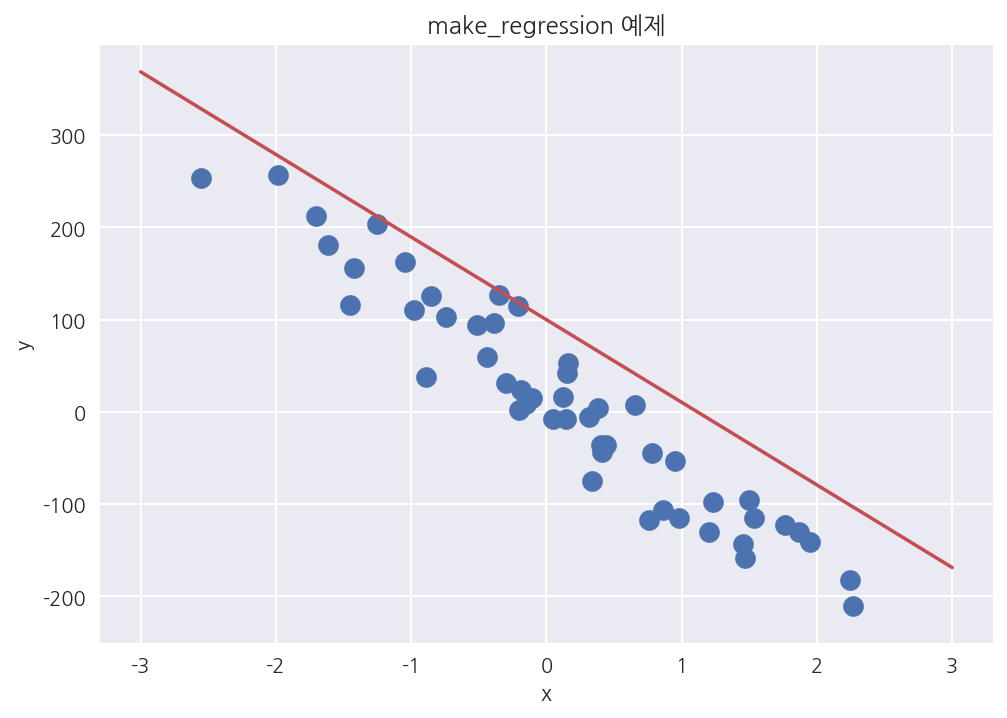

In [115]:
from sklearn.datasets import make_regression

X, y, w = make_regression2(
    n_samples = 50, bias = 20, noise = 40, coef = True)

# X, y, w = make_regression(
#     n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
# )

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()


In [116]:
X

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028])

In [117]:
y

array([-122.48888889,  -36.26494543, -114.86800106, -181.79178184,
       -130.10029831,  110.17265514,  -52.9783649 ,    8.18064814,
         14.73325639,  -43.66614077,   -7.28074659, -142.75118091,
       -117.19968756,   16.20145483,  -35.81770572,  -75.08735413,
        -95.27849476,    2.07930192,   -5.95634999,  125.64503995,
        253.77101755,    7.04666778, -106.80040385,  102.55206151,
       -210.64134043,  115.40169697,   -7.2515088 ,   24.29958656,
       -115.00863953, -158.18215812,   42.15803563,    4.76330849,
         38.0484976 ,  256.90378793,  126.98993664,   53.15065548,
        -97.36540995, -130.4991997 ,   96.8618904 ,   30.94312257,
        162.7922146 ,  155.48885703,  211.85635147, -140.4307576 ,
         93.90057539,   59.64808967,  203.61845505,  -44.54517782,
        180.5987301 ,  114.3762086 ])

In [118]:
w

-89.54665611936757

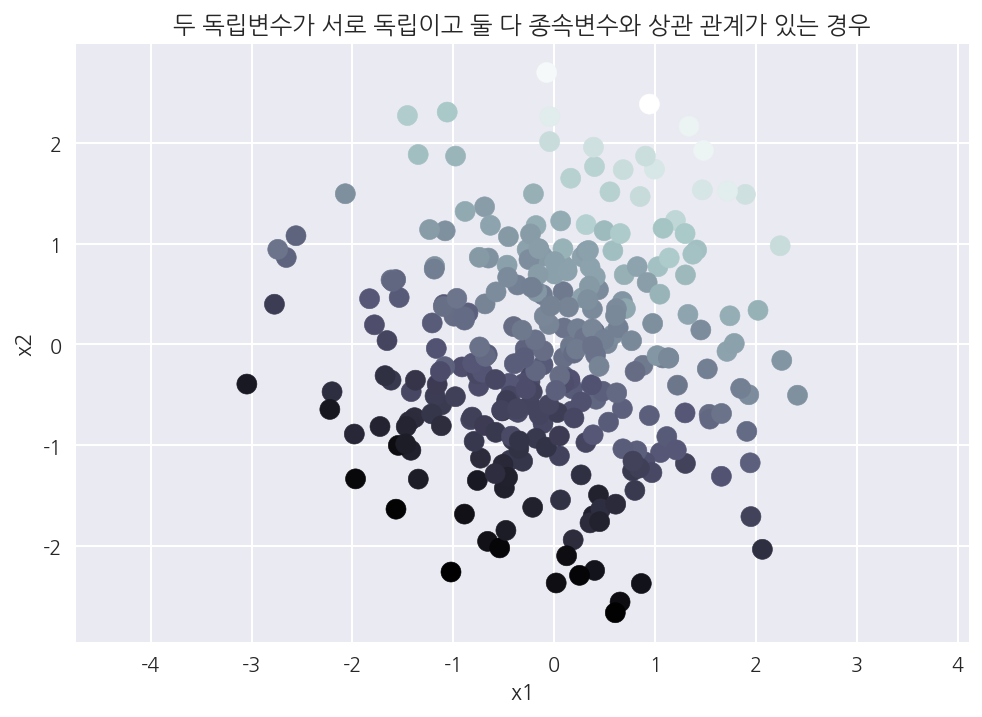

In [68]:
X, y, w = make_regression(
    n_samples=300, n_features=2, noise=10, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.show()

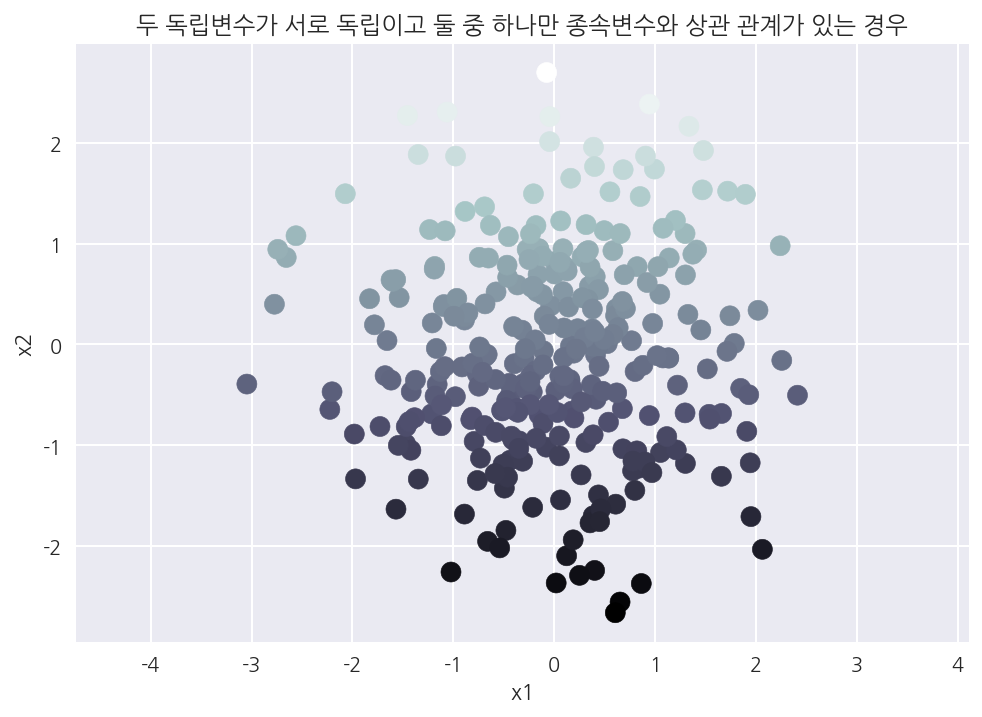

In [69]:
# x1은 y에 영향 x
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

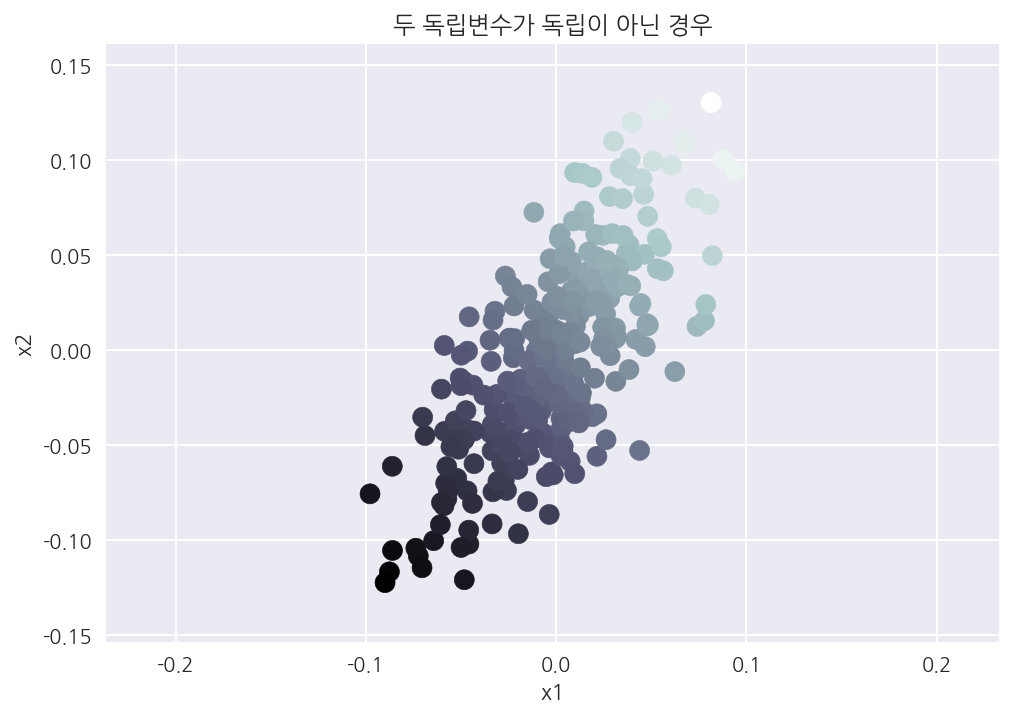

In [70]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()